This notebook is here to help you collect images to train a custom object detection model with your own game pieces.

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv
from PIL import Image 
import time

from reachy_sdk import ReachySDK

from reachy_sdk.trajectory import goto
from reachy_sdk.trajectory.interpolation import InterpolationMode

from PIL import ImageDraw


In [2]:
reachy = ReachySDK('localhost')

The robot will look up and down 10 times, move the board pieces during that time. Try not to have your hand on the board while he is looking at the board. 

KeyboardInterrupt: 

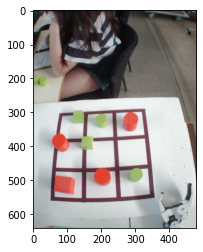

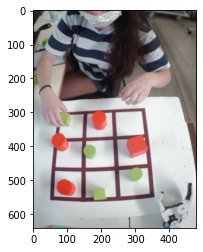

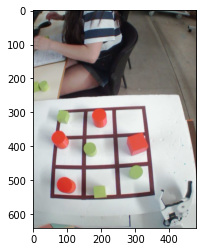

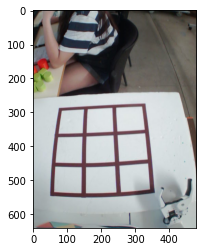

In [8]:
for i in range(10):
    reachy.turn_on('head')
    reachy.head.look_at(x=1, y=0, z=0, duration=1.5)  

    time.sleep(1.0)

    reachy.head.look_at(x=0.7, y=0, z=-0.6, duration=1.5) 
    #you can adjust the z parameter to get the board in the image

    img = reachy.right_camera.wait_for_new_frame()
    time.sleep(2.0)
    
    plt.figure()
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    
    # Crop the image to see only the grid (adjust this parameter if you don't see the grid on your images)
    y1 = 290
    y2 = 600
    x1 = 10
    x2 = 380
    dim = (300,300)
    img = img[y1:y2, x1:x2]
    # Resize the image for the model (300x300)
    img = cv.resize(img, dim)
    # Save the image on the folder of your choice folder
    cv.imwrite(f'/home/reachy/Desktop/data/Nouveau dossier/image{i}.png', img)
    
    reachy.head.look_at(x=1, y=0, z=0, duration=1.5)
    time.sleep(10) #you havce 10 second to move the board pieces 
    print('/!\ WARNING NEW PICTURE /!\')

You have follow the section 5 on this link to create your dataset : https://learn.e.ros4.pro/fr/vision/object_detection_tf2/ 